<a href="https://colab.research.google.com/github/Rakshithadhandre/Machine_Learning_Models/blob/main/KNN_Algo_Malaria_outbreak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

**Reading the Data**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv")
df.head(30)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No


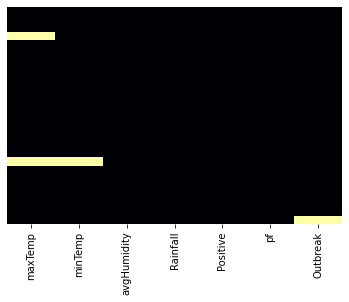

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='inferno')
  return plt.show()
get_heatmap(df)

In [4]:
#replacing the values of column with the median of values-less no. of records in dataset
#accesing the col value
median_maxTemp=df['maxTemp'].median()

In [5]:
median_minTemp=df['minTemp'].median()
print(median_minTemp)

24.0


In [6]:
import math
median_minTemp=math.floor(df['minTemp'].median())
median_maxTemp=math.floor(df['maxTemp'].median())
print(median_minTemp)
print(median_maxTemp)

24
33


In [7]:
#replacing NaN values
df['maxTemp']=df['maxTemp'].fillna(median_minTemp)
df['minTemp']=df['minTemp'].fillna(median_minTemp)

In [8]:
#data preprocessing
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
#fitting the technique to dataset 
df.Outbreak=LE.fit_transform(df.Outbreak)#converting variables to numeric values

In [74]:
df.head(26)

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
3,24.0,24.0,84.57,11.15,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1
6,31.0,24.0,88.77,41.40,1
7,33.0,24.0,77.94,23.88,1
8,31.0,24.0,84.57,11.15,0
9,36.0,24.0,53.40,2.12,0


In [75]:
df['Outbreak']=df['Outbreak'].replace(2,0)
print(df)   

    maxTemp  minTemp  avgHumidity  Rainfall  Outbreak
0      29.0     18.0        49.74      0.00         0
1      34.0     23.0        83.27     15.22         1
2      40.0     23.0        50.74      0.00         0
3      24.0     24.0        84.57     11.15         0
4      34.0     24.0        59.16      9.06         0
5      34.0     27.0        73.23      0.00         1
6      31.0     24.0        88.77     41.40         1
7      33.0     24.0        77.94     23.88         1
8      31.0     24.0        84.57     11.15         0
9      36.0     24.0        53.40      2.12         0
10     32.0     23.0        57.50      0.00         1
11     34.0     18.0        59.40      0.00         0
12     42.0     24.0        49.43      2.19         0
13     45.0     32.0        34.74      0.38         0
14     43.0     28.0        69.07      4.65         0
15     33.0     23.0        80.97      6.92         1
16     32.0     24.0        87.32     11.92         0
17     40.0     27.0        

<AxesSubplot:>

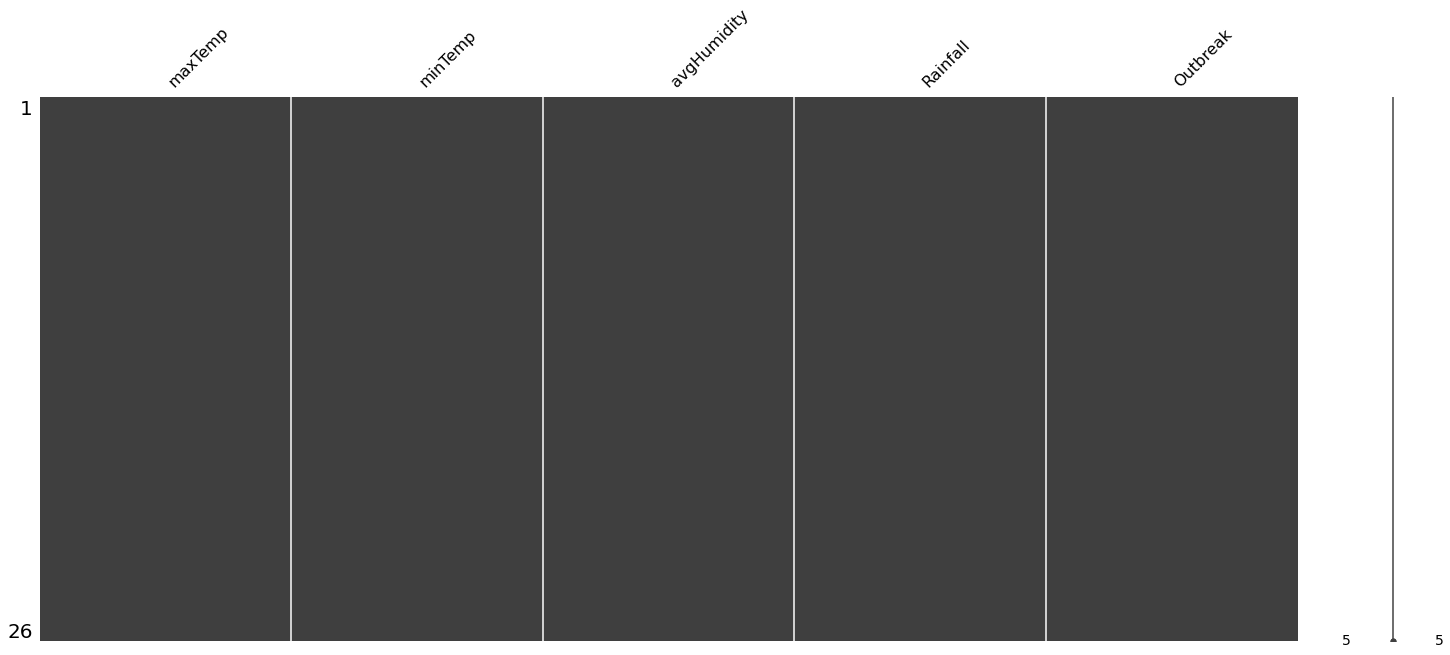

In [76]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

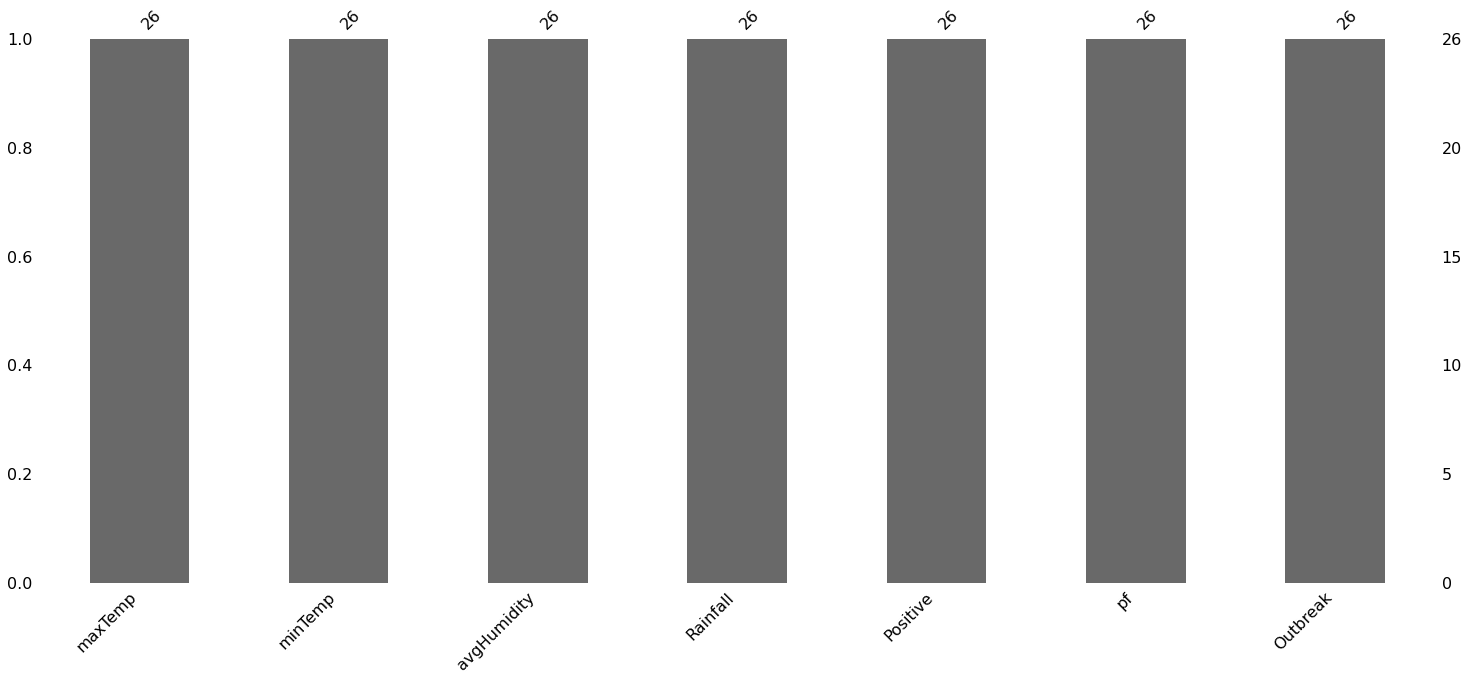

In [12]:
msno.bar(df)

**Feature Engineering**

In [77]:
df=df.drop(['Positive','pf'],axis=1)

KeyError: ignored

In [78]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
3,24.0,24.0,84.57,11.15,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1
6,31.0,24.0,88.77,41.40,1
7,33.0,24.0,77.94,23.88,1
8,31.0,24.0,84.57,11.15,0
9,36.0,24.0,53.40,2.12,0


**Loading the Data**

In [79]:
#method1-loading the data into training and testing
X=df.iloc[:,:-1].values #iloc-index location of 2D array
Y=df.iloc[:,-1:].values #converted into 2D array

In [80]:
X

array([[29.  , 18.  , 49.74,  0.  ],
       [34.  , 23.  , 83.27, 15.22],
       [40.  , 23.  , 50.74,  0.  ],
       [24.  , 24.  , 84.57, 11.15],
       [34.  , 24.  , 59.16,  9.06],
       [34.  , 27.  , 73.23,  0.  ],
       [31.  , 24.  , 88.77, 41.4 ],
       [33.  , 24.  , 77.94, 23.88],
       [31.  , 24.  , 84.57, 11.15],
       [36.  , 24.  , 53.4 ,  2.12],
       [32.  , 23.  , 57.5 ,  0.  ],
       [34.  , 18.  , 59.4 ,  0.  ],
       [42.  , 24.  , 49.43,  2.19],
       [45.  , 32.  , 34.74,  0.38],
       [43.  , 28.  , 69.07,  4.65],
       [33.  , 23.  , 80.97,  6.92],
       [32.  , 24.  , 87.32, 11.92],
       [40.  , 27.  , 63.97,  0.  ],
       [24.  , 24.  , 84.57, 11.15],
       [39.  , 25.  , 47.52,  0.  ],
       [36.  , 26.  , 72.78,  3.54],
       [31.  , 23.  , 73.35,  4.97],
       [30.  , 23.  , 86.81,  7.21],
       [30.  , 22.  , 78.8 ,  3.12],
       [33.  , 22.  , 73.71,  1.75],
       [ 1.  , 24.  , 84.57, 11.15]])

In [81]:
Y

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

**Splitting the Data**

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)#20%-testing 80%-training

In [91]:
X_train

array([[30.  , 23.  , 86.81,  7.21],
       [45.  , 32.  , 34.74,  0.38],
       [24.  , 24.  , 84.57, 11.15],
       [39.  , 25.  , 47.52,  0.  ],
       [32.  , 24.  , 87.32, 11.92],
       [34.  , 23.  , 83.27, 15.22],
       [32.  , 23.  , 57.5 ,  0.  ],
       [ 1.  , 24.  , 84.57, 11.15],
       [33.  , 22.  , 73.71,  1.75],
       [31.  , 24.  , 84.57, 11.15],
       [31.  , 24.  , 88.77, 41.4 ],
       [34.  , 24.  , 59.16,  9.06],
       [36.  , 24.  , 53.4 ,  2.12],
       [33.  , 24.  , 77.94, 23.88],
       [30.  , 22.  , 78.8 ,  3.12],
       [24.  , 24.  , 84.57, 11.15],
       [29.  , 18.  , 49.74,  0.  ],
       [31.  , 23.  , 73.35,  4.97],
       [33.  , 23.  , 80.97,  6.92],
       [42.  , 24.  , 49.43,  2.19]])

In [113]:
#Normalizing the data-standard scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)#normalization
X_test=sst.transform(X_test)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5)

In [123]:
#Training
knn_clf.fit(X_train,Y_train) #fit the model with data 

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [124]:
y_pred=knn_clf.predict(X_test)

In [125]:
print("Predicted value for training data",knn_clf.score(X_train,Y_train))
print("predicted value for testing data",knn_clf.score(X_test,Y_test))
print("Overall Accuracy:",knn_clf.score(sst.transform(X),Y))

Predicted value for training data 0.75
predicted value for testing data 0.5
Overall Accuracy: 0.6923076923076923


**Cross validation to find the best k value and make trials**

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

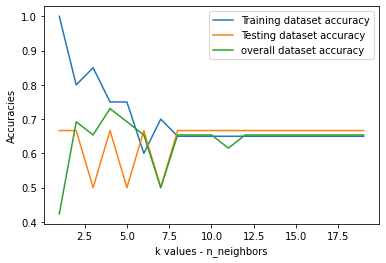

In [108]:
neighbors=np.arange(1,20) #creates an array contains the array range 1 to 20

#as to keep a track of each k values we take 2 empty arrays i.e train_accuracy and test_accuracy
train_accuracy = np.empty(len(neighbors))#len of array= len of neighbors
test_accuracy = np.empty(len(neighbors))
overall_accuracy = np.empty(len(neighbors))

#Loop over K values
for i,k in enumerate(neighbors): 
 knn=KNeighborsClassifier(n_neighbors=k)  #calling classifiers with parameters
 knn.fit(X_train,Y_train)  #fitting the data

   #compute the training accuracy of ML model
 train_accuracy[i] = knn.score(X_train,Y_train) #additional i is used to keep track of indexes and store the values of accuracy at appropriate place so that we can see at what k value we got good accuracy.
 test_accuracy[i] = knn.score(X_test,Y_test)

#Overall score
 overall_accuracy[i] = knn.score(sst.transform(X),Y)

 import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label='Training dataset accuracy')
plt.plot(neighbors,test_accuracy,label='Testing dataset accuracy')
plt.plot(neighbors,overall_accuracy,label='overall dataset accuracy')
plt.legend() 
plt.xlabel('k values - n_neighbors')
plt.ylabel('Accuracies')
plt.show()
